In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime

In [102]:
import time

# Début du chronomètre
start_time = time.time()

pathfile=r'data_anonymous'

# reflist: list of epc in each box
reflist=pd.DataFrame()
# 
files=os.listdir(pathfile)
for file in files:
    print(file)
    if file.startswith('reflist_'):
        temp=pd.read_csv(os.path.join(pathfile,file),sep=',').reset_index(drop=True)[['Epc']]
        temp['refListId']=file.split('.')[0]
        #reflist=reflist.append(temp)
        reflist = pd.concat([reflist, temp],axis=0) 
reflist=reflist.rename(columns={'refListId':'refListId_actual'})
reflist['refListId_actual']=reflist['refListId_actual'].apply(lambda x:int(x[8:]))
Q_refListId_actual=reflist.groupby('refListId_actual')['Epc'].nunique().rename('Q refListId_actual').reset_index(drop=False)
reflist=pd.merge(reflist,Q_refListId_actual,on='refListId_actual',how='left')
reflist

ano_APTags-TagsAutomatedProcess-2019-11-07-16_29_46.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-16_57_34.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-17_16_18.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-17_32_19.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-17_58_50.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_13_30.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_21_44.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_30_01.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_38_19.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_49_44.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-19_00_26.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-19_10_51.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-19_20_14.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-19_29_54.csv
ano_APTags-TagsAutomatedProcess-2019-11-08-10_55_25.csv
ano_supply-process.2019-11-07-CUT.csv
reflist_0.olpn
reflist_1.olpn
reflist_2.olpn
reflist_3.olpn
reflist_4.olpn
reflist_5.olpn
reflist_6.olpn
reflist_7.olpn
re

,Epc,refListId_actual,Q refListId_actual
0,epc_90,0,16
1,epc_91,0,16
2,epc_92,0,16
3,epc_93,0,16
4,epc_94,0,16
...,...,...,...
197,epc_133,9,8
198,epc_134,9,8
199,epc_135,9,8
200,epc_136,9,8


In [103]:
# pathfile=r'data_anonymous'
# 
# df : rfid readings
df=pd.DataFrame()
# 
files=os.listdir(pathfile)
for file in files:
    print(file)
    if file.startswith('ano_APTags'):
        temp=pd.read_csv(os.path.join(pathfile,file),sep=',')
        #df=df.append(temp)
        df = pd.concat([df, temp],axis=0) 
df['LogTime']=pd.to_datetime (df['LogTime'] ,format='%Y-%m-%d-%H:%M:%S') 
df['TimeStamp']=df['TimeStamp'].astype(float)
df['Rssi']=df['Rssi'].astype(float)
df=df.drop(['Reader','EmitPower','Frequency'],axis=1).reset_index(drop=True)
df=df[['LogTime', 'Epc', 'Rssi', 'Ant']]
# antennas 1 and 2 are facing the box when photocell in/out 
Ant_loc=pd.DataFrame({'Ant':[1,2,3,4],'loc':['in','in','out','out']})
df=pd.merge(df,Ant_loc,on=['Ant'])
df=df.sort_values('LogTime').reset_index(drop=True)

ano_APTags-TagsAutomatedProcess-2019-11-07-16_29_46.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-16_57_34.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-17_16_18.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-17_32_19.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-17_58_50.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_13_30.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_21_44.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_30_01.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_38_19.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_49_44.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-19_00_26.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-19_10_51.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-19_20_14.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-19_29_54.csv
ano_APTags-TagsAutomatedProcess-2019-11-08-10_55_25.csv
ano_supply-process.2019-11-07-CUT.csv
reflist_0.olpn
reflist_1.olpn
reflist_2.olpn
reflist_3.olpn
reflist_4.olpn
reflist_5.olpn
reflist_6.olpn
reflist_7.olpn
re

In [104]:
tags=df
tags.head()

,LogTime,Epc,Rssi,Ant,loc
0,2019-11-07 15:32:10,epc_100,-69.0,3,out
1,2019-11-07 15:32:10,epc_97,-69.0,3,out
2,2019-11-07 15:32:10,epc_97,-65.0,3,out
3,2019-11-07 15:32:10,epc_99,-70.0,3,out
4,2019-11-07 15:32:10,epc_100,-66.0,3,out


In [105]:
len(df)

1204003

In [106]:
# timing: photocells a time window for each box: start/stop (ciuchStart, ciuchStop)
file=r'ano_supply-process.2019-11-07-CUT.csv'
timing=pd.read_csv(os.path.join(pathfile,file),sep=',')
timing['file']=file
timing['date']=pd.to_datetime(timing['date'],format='%d/%m/%Y %H:%M:%S,%f')
timing['ciuchStart']=pd.to_datetime(timing['ciuchStart'],format='%d/%m/%Y %H:%M:%S,%f')
timing['ciuchStop']=pd.to_datetime(timing['ciuchStop'],format='%d/%m/%Y %H:%M:%S,%f')
timing['timestampStart']=timing['timestampStart'].astype(float)
timing['timestampStop']=timing['timestampStop'].astype(float)
timing=timing.sort_values('date')
timing.loc[:,'refListId']=timing.loc[:,'refListId'].apply(lambda x:int(x[8:]))
timing=timing[['refListId', 'ciuchStart', 'ciuchStop']]
timing[:1]

,refListId,ciuchStart,ciuchStop
0,0,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197


In [107]:
len(timing)

389

In [108]:
timing

,refListId,ciuchStart,ciuchStop
0,0,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197
1,1,2019-11-07 18:54:02.637,2019-11-07 18:54:04.463
2,2,2019-11-07 18:54:13.587,2019-11-07 18:54:15.447
3,3,2019-11-07 18:54:17.942,2019-11-07 18:54:19.591
4,4,2019-11-07 18:54:23.683,2019-11-07 18:54:25.528
...,...,...,...
384,7,2019-11-07 19:34:22.740,2019-11-07 19:34:24.686
385,8,2019-11-07 19:34:27.950,2019-11-07 19:34:29.670
386,9,2019-11-07 19:34:33.696,2019-11-07 19:34:35.671
387,0,2019-11-07 19:34:39.687,2019-11-07 19:34:41.624


In [109]:
# ciuchStart_up starts upstream ciuchStart, half way in between the previous stop and the actual start
timing[['ciuchStop_last']]=timing[['ciuchStop']].shift(1)
timing[['refListId_last']]=timing[['refListId']].shift(1)

timing['ciuchStartup']=timing['ciuchStart'] - (timing['ciuchStart'] - timing['ciuchStop_last'])/2
# timing start: 10sec before timing
timing.loc[0,'refListId_last']=timing.loc[0,'refListId']
timing.loc[0,'ciuchStartup']=timing.loc[0,'ciuchStart']-datetime.timedelta(seconds=10)
timing.loc[0,'ciuchStop_last']=timing.loc[0,'ciuchStartup']-datetime.timedelta(seconds=10)
timing['refListId_last']=timing['refListId_last'].astype(int)
# 
timing['ciuchStopdown']= timing['ciuchStartup'].shift(-1)
timing.loc[len(timing)-1,'ciuchStopdown']=timing.loc[len(timing)-1,'ciuchStop']+datetime.timedelta(seconds=10)
timing=timing[['refListId', 'refListId_last','ciuchStartup', 'ciuchStart','ciuchStop','ciuchStopdown']]
timing.head()

,refListId,refListId_last,ciuchStartup,ciuchStart,ciuchStop,ciuchStopdown
0,0,0,2019-11-07 18:53:42.370000,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417000
1,1,0,2019-11-07 18:53:58.417000,2019-11-07 18:54:02.637,2019-11-07 18:54:04.463,2019-11-07 18:54:09.025000
2,2,1,2019-11-07 18:54:09.025000,2019-11-07 18:54:13.587,2019-11-07 18:54:15.447,2019-11-07 18:54:16.694500
3,3,2,2019-11-07 18:54:16.694500,2019-11-07 18:54:17.942,2019-11-07 18:54:19.591,2019-11-07 18:54:21.637000
4,4,3,2019-11-07 18:54:21.637000,2019-11-07 18:54:23.683,2019-11-07 18:54:25.528,2019-11-07 18:54:27.475000


In [110]:
# box 0 always starts
timing[timing['refListId']==0].head()

,refListId,refListId_last,ciuchStartup,ciuchStart,ciuchStop,ciuchStopdown
0,0,0,2019-11-07 18:53:42.370000,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417000
10,0,9,2019-11-07 18:54:55.894500,2019-11-07 18:54:57.738,2019-11-07 18:54:59.584,2019-11-07 18:55:01.765000
20,0,9,2019-11-07 18:55:53.460500,2019-11-07 18:55:55.497,2019-11-07 18:55:57.377,2019-11-07 18:55:59.567500
30,0,9,2019-11-07 18:56:51.317000,2019-11-07 18:56:53.344,2019-11-07 18:56:55.215,2019-11-07 18:56:57.241500
40,0,9,2019-11-07 18:58:02.390500,2019-11-07 18:58:04.351,2019-11-07 18:58:06.212,2019-11-07 18:58:11.428000


In [111]:
# t0_run = a new run starts when box 0 shows up
t0_run=timing[timing['refListId']==0] [['ciuchStartup']]
t0_run=t0_run.rename(columns={'ciuchStartup':'t0_run'})
t0_run=t0_run.groupby('t0_run').size().cumsum().rename('run').reset_index(drop=False)
t0_run=t0_run.sort_values('t0_run')
# 
# each row in timing is merged with a last row in t0_run where t0_run (ciuchstart) <= timing (ciuchstart)
timing=pd.merge_asof(timing,t0_run,left_on='ciuchStartup',right_on='t0_run', direction='backward')
timing=timing.sort_values('ciuchStop')
timing=timing[['run', 'refListId', 'refListId_last', 'ciuchStartup','ciuchStart','ciuchStop','ciuchStopdown','t0_run']]
timing.head()

,run,refListId,refListId_last,ciuchStartup,ciuchStart,ciuchStop,ciuchStopdown,t0_run
0,1,0,0,2019-11-07 18:53:42.370000,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417000,2019-11-07 18:53:42.370
1,1,1,0,2019-11-07 18:53:58.417000,2019-11-07 18:54:02.637,2019-11-07 18:54:04.463,2019-11-07 18:54:09.025000,2019-11-07 18:53:42.370
2,1,2,1,2019-11-07 18:54:09.025000,2019-11-07 18:54:13.587,2019-11-07 18:54:15.447,2019-11-07 18:54:16.694500,2019-11-07 18:53:42.370
3,1,3,2,2019-11-07 18:54:16.694500,2019-11-07 18:54:17.942,2019-11-07 18:54:19.591,2019-11-07 18:54:21.637000,2019-11-07 18:53:42.370
4,1,4,3,2019-11-07 18:54:21.637000,2019-11-07 18:54:23.683,2019-11-07 18:54:25.528,2019-11-07 18:54:27.475000,2019-11-07 18:53:42.370


In [112]:
timing[:12]

,run,refListId,refListId_last,ciuchStartup,ciuchStart,ciuchStop,ciuchStopdown,t0_run
0,1,0,0,2019-11-07 18:53:42.370000,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417000,2019-11-07 18:53:42.370000
1,1,1,0,2019-11-07 18:53:58.417000,2019-11-07 18:54:02.637,2019-11-07 18:54:04.463,2019-11-07 18:54:09.025000,2019-11-07 18:53:42.370000
2,1,2,1,2019-11-07 18:54:09.025000,2019-11-07 18:54:13.587,2019-11-07 18:54:15.447,2019-11-07 18:54:16.694500,2019-11-07 18:53:42.370000
3,1,3,2,2019-11-07 18:54:16.694500,2019-11-07 18:54:17.942,2019-11-07 18:54:19.591,2019-11-07 18:54:21.637000,2019-11-07 18:53:42.370000
4,1,4,3,2019-11-07 18:54:21.637000,2019-11-07 18:54:23.683,2019-11-07 18:54:25.528,2019-11-07 18:54:27.475000,2019-11-07 18:53:42.370000
5,1,5,4,2019-11-07 18:54:27.475000,2019-11-07 18:54:29.422,2019-11-07 18:54:31.278,2019-11-07 18:54:33.115500,2019-11-07 18:53:42.370000
6,1,6,5,2019-11-07 18:54:33.115500,2019-11-07 18:54:34.953,2019-11-07 18:54:36.685,2019-11-07 18:54:38.757000,2019-11-07 18:53:42.370000
7,1,7,6,2019-11-07 18:54:38.757000,2019-11-07 18:54:40.829,2019-11-07 18:54:42.611,2019-11-07 18:54:44.497000,2019-11-07 18:53:42.370000
8,1,8,7,2019-11-07 18:54:44.497000,2019-11-07 18:54:46.383,2019-11-07 18:54:48.158,2019-11-07 18:54:50.140000,2019-11-07 18:53:42.370000
9,1,9,8,2019-11-07 18:54:50.140000,2019-11-07 18:54:52.122,2019-11-07 18:54:54.051,2019-11-07 18:54:55.894500,2019-11-07 18:53:42.370000


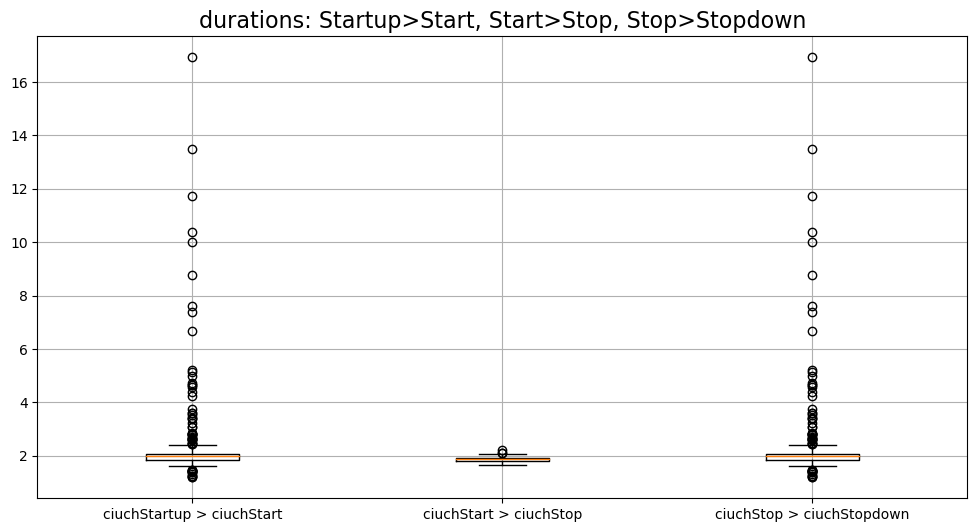

In [113]:
plt.figure(figsize=(12,6))
up=(timing['ciuchStart']-timing['ciuchStartup']).apply(lambda x:x.total_seconds())
mid=(timing['ciuchStop']-timing['ciuchStart']).apply(lambda x:x.total_seconds())
down=(timing['ciuchStopdown']-timing['ciuchStop']).apply(lambda x:x.total_seconds())
plt.boxplot([up,mid,down],labels=['ciuchStartup > ciuchStart','ciuchStart > ciuchStop','ciuchStop > ciuchStopdown'])
plt.grid()
plt.title('durations: Startup>Start, Start>Stop, Stop>Stopdown',size=16)
plt.show()

In [114]:
#  full window (ciuchStartup > ciuchStopdown) is sliced in smaller slices
# ciuchStartup > ciuchStart: 11 slices named up_0, up_1, ..., up_10
# ciuchStart > ciuchStop: 11 slices named mid_0, mid_1, ... mid_10
# ciuchStop > ciuchStopdown: 11 slices names down_0, down_1, ... down_10
slices=pd.DataFrame()
for i, row in timing .iterrows():
    ciuchStartup=row['ciuchStartup']
    ciuchStart=row['ciuchStart']
    ciuchStop=row['ciuchStop']
    ciuchStopdown=row['ciuchStopdown']
    steps=4
#     
    up=pd.DataFrame(index=pd.date_range(start=ciuchStartup, end=ciuchStart,periods=steps,inclusive='left'))\
        .reset_index(drop=False).rename(columns={'index':'slice'})
    up.index=['up_'+str(x) for x in range(steps-1)]
    #slices=slices.append(up)
    slices=pd.concat([slices, up])
#     
    mid=pd.DataFrame(index=pd.date_range(start=ciuchStart, end=ciuchStop,periods=steps,inclusive='left'))\
        .reset_index(drop=False).rename(columns={'index':'slice'})
    mid.index=['mid_'+str(x) for x in range(steps-1)]
    #slices=slices.append(mid)
    slices=pd.concat([slices, mid])
#     
    down=pd.DataFrame(index=pd.date_range(start=ciuchStop, end=ciuchStopdown,periods=steps,inclusive='left'))\
        .reset_index(drop=False).rename(columns={'index':'slice'})
    down.index=['down_'+str(x) for x in range(steps-1)]
    slices=pd.concat([slices, down])
#     slices=slices.append(up)
slices=slices.reset_index(drop=False).rename(columns={'index':'slice_id'})
# 
timing_slices=pd.merge_asof(slices,timing,left_on='slice',right_on='ciuchStartup',direction='backward')
timing_slices=timing_slices[['run', 'refListId', 'refListId_last','slice_id','slice',  \
                             'ciuchStartup', 'ciuchStart', 'ciuchStop', 'ciuchStopdown','t0_run']]
timing_slices.head()

,run,refListId,refListId_last,slice_id,slice,ciuchStartup,ciuchStart,ciuchStop,ciuchStopdown,t0_run
0,1,0,0,up_0,2019-11-07 18:53:42.370000000,2019-11-07 18:53:42.370,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417,2019-11-07 18:53:42.370
1,1,0,0,up_1,2019-11-07 18:53:45.703333333,2019-11-07 18:53:42.370,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417,2019-11-07 18:53:42.370
2,1,0,0,up_2,2019-11-07 18:53:49.036666666,2019-11-07 18:53:42.370,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417,2019-11-07 18:53:42.370
3,1,0,0,mid_0,2019-11-07 18:53:52.370000000,2019-11-07 18:53:42.370,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417,2019-11-07 18:53:42.370
4,1,0,0,mid_1,2019-11-07 18:53:52.979000000,2019-11-07 18:53:42.370,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417,2019-11-07 18:53:42.370


In [115]:
len(timing_slices)

3501

In [116]:
# merge between df and timing
# merge_asof needs sorted df > df_ref
df=df[ (df['LogTime']>=timing['ciuchStartup'].min()) & (df['LogTime']<=timing['ciuchStopdown'].max())  ]
df=df.sort_values('LogTime')
# 
# each row in df_ref is merged with the last row in timing where timing (ciuchstart_up) < df_ref (logtime)
# 
# df_timing=pd.merge_asof(df_ref,timing,left_on=['LogTime'],right_on=['ciuchStartup'],direction='backward')
# df_timing=df_timing.dropna()
# df_timing=df_timing.sort_values('LogTime').reset_index(drop=True)
# df_timing=df_timing[['run', 'Epc','refListId', 'refListId_last', 'ciuchStartup',\
#                      'LogTime', 'ciuchStop', 'ciuchStopdown','Rssi', 'loc', 'refListId_actual']]
# 
# each row in df
# _ref is merged with the last row in timing_slices where timing (slice) < df_ref (logtime)
# 
df_timing_slices=pd.merge_asof(df,timing_slices,left_on=['LogTime'],right_on=['slice'],direction='backward')
df_timing_slices=df_timing_slices.dropna()
df_timing_slices=df_timing_slices.sort_values('slice').reset_index(drop=True)
df_timing_slices=df_timing_slices[['run', 'Epc','refListId', 'refListId_last', 'ciuchStartup','slice_id','slice','LogTime', \
                      'ciuchStart','ciuchStop', 'ciuchStopdown', 'Rssi', 'loc','t0_run']]

df_timing_slices

,run,Epc,refListId,refListId_last,ciuchStartup,slice_id,slice,LogTime,ciuchStart,ciuchStop,ciuchStopdown,Rssi,loc,t0_run
0,1,epc_131,0,0,2019-11-07 18:53:42.370,up_0,2019-11-07 18:53:42.370000000,2019-11-07 18:53:43,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417,-62.0,out,2019-11-07 18:53:42.370
1,1,epc_133,0,0,2019-11-07 18:53:42.370,up_0,2019-11-07 18:53:42.370000000,2019-11-07 18:53:45,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417,-67.0,in,2019-11-07 18:53:42.370
2,1,epc_131,0,0,2019-11-07 18:53:42.370,up_0,2019-11-07 18:53:42.370000000,2019-11-07 18:53:45,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417,-69.0,in,2019-11-07 18:53:42.370
3,1,epc_133,0,0,2019-11-07 18:53:42.370,up_0,2019-11-07 18:53:42.370000000,2019-11-07 18:53:45,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417,-67.0,out,2019-11-07 18:53:42.370
4,1,epc_175,0,0,2019-11-07 18:53:42.370,up_0,2019-11-07 18:53:42.370000000,2019-11-07 18:53:45,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417,-65.0,out,2019-11-07 18:53:42.370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356063,40,epc_162,1,0,2019-11-07 19:34:44.230,down_2,2019-11-07 19:34:55.305666666,2019-11-07 19:34:57,2019-11-07 19:34:46.836,2019-11-07 19:34:48.639,2019-11-07 19:34:58.639,-67.0,out,2019-11-07 19:34:37.679
356064,40,epc_187,1,0,2019-11-07 19:34:44.230,down_2,2019-11-07 19:34:55.305666666,2019-11-07 19:34:57,2019-11-07 19:34:46.836,2019-11-07 19:34:48.639,2019-11-07 19:34:58.639,-65.0,out,2019-11-07 19:34:37.679
356065,40,epc_87,1,0,2019-11-07 19:34:44.230,down_2,2019-11-07 19:34:55.305666666,2019-11-07 19:34:57,2019-11-07 19:34:46.836,2019-11-07 19:34:48.639,2019-11-07 19:34:58.639,-69.0,out,2019-11-07 19:34:37.679
356066,40,epc_188,1,0,2019-11-07 19:34:44.230,down_2,2019-11-07 19:34:55.305666666,2019-11-07 19:34:57,2019-11-07 19:34:46.836,2019-11-07 19:34:48.639,2019-11-07 19:34:58.639,-59.0,out,2019-11-07 19:34:37.679


In [117]:
# 

In [118]:
# df_timing_slices=pd.merge(df_timing_slices, reflist, on='Epc',how='left')
# df_timing_slices = df_timing_slices [ ~((df_timing_slices['refListId']==0) & (df_timing_slices['refListId_actual']==9)) ]
# # 
# df_timing_slices = df_timing_slices [ ~((df_timing_slices['refListId']==9) & (df_timing_slices['refListId_actual']==0)) ]
# # # 
# # df_timing_slices = df_timing_slices [ ~((df_timing_slices['refListId']==0) | (df_timing_slices['refListId_actual']==0)) ]

# df_timing_slices=df_timing_slices.drop(['refListId_actual','Q refListId_actual'],axis=1)

In [119]:
runs_out=df_timing_slices .groupby('run')['refListId'].nunique().rename('Q refListId').reset_index(drop=False)
runs_out[runs_out['Q refListId']!=10]

,run,Q refListId
15,16,9
22,23,9
31,32,9
39,40,2


In [120]:
current_last_windows=timing_slices.drop_duplicates(['run','refListId','refListId_last'])
current_last_windows=current_last_windows[['run','refListId','refListId_last','ciuchStop']].reset_index(drop=True)
current_last_windows[:1]

,run,refListId,refListId_last,ciuchStop
0,1,0,0,2019-11-07 18:53:54.197


In [121]:
# runs 16 23 32 40 have missing boxes: discarded
# also run 1 is the start, no previous box: discarded
# run 18: box 0 run at the end
# 
timing=timing[~timing['run'].isin([1,18,16,23,32,40])]
timing_slices=timing_slices[~timing_slices['run'].isin([1,18,16,23,32,40])]
df_timing_slices=df_timing_slices[~df_timing_slices['run'].isin([1,18,16,23,32,40])]

df_timing_slices=df_timing_slices.sort_values(['LogTime','Epc'])
# 

In [122]:
len(timing),len(timing_slices), len(df_timing_slices)

(340, 3060, 307965)

In [123]:
df_timing_slices[:1]

,run,Epc,refListId,refListId_last,ciuchStartup,slice_id,slice,LogTime,ciuchStart,ciuchStop,ciuchStopdown,Rssi,loc,t0_run
8970,2,epc_100,0,9,2019-11-07 18:54:55.894500,up_0,2019-11-07 18:54:55.894500,2019-11-07 18:54:56,2019-11-07 18:54:57.738,2019-11-07 18:54:59.584,2019-11-07 18:55:01.765,-68.0,in,2019-11-07 18:54:55.894500


In [124]:
# df_timing_slices['dt']=
df_timing_slices['dt']=(df_timing_slices['LogTime']-df_timing_slices['t0_run']).apply(lambda x:x.total_seconds())

LogTime :cette colonne indique le moment précis où un événement lié au tag RFID a été enregistré.

'dt' : Cette colonne contient la différence de temps en secondes entre les valeurs de la colonne 'LogTime' et 't0_run' pour chaque ligne du DataFrame.

In [125]:
df_timing_slices[:1]

,run,Epc,refListId,refListId_last,ciuchStartup,slice_id,slice,LogTime,ciuchStart,ciuchStop,ciuchStopdown,Rssi,loc,t0_run,dt
8970,2,epc_100,0,9,2019-11-07 18:54:55.894500,up_0,2019-11-07 18:54:55.894500,2019-11-07 18:54:56,2019-11-07 18:54:57.738,2019-11-07 18:54:59.584,2019-11-07 18:55:01.765,-68.0,in,2019-11-07 18:54:55.894500,0.1055


In [126]:
df_timing_slices['reflist_run_id'] = df_timing_slices['refListId'].astype(str) +"_"+ df_timing_slices['run'].astype(str)

In [127]:
df_timing_slices

,run,Epc,refListId,refListId_last,ciuchStartup,slice_id,slice,LogTime,ciuchStart,ciuchStop,ciuchStopdown,Rssi,loc,t0_run,dt,reflist_run_id
8970,2,epc_100,0,9,2019-11-07 18:54:55.894500,up_0,2019-11-07 18:54:55.894500000,2019-11-07 18:54:56,2019-11-07 18:54:57.738,2019-11-07 18:54:59.584,2019-11-07 18:55:01.765,-68.0,in,2019-11-07 18:54:55.894500,0.1055,0_2
8971,2,epc_100,0,9,2019-11-07 18:54:55.894500,up_0,2019-11-07 18:54:55.894500000,2019-11-07 18:54:56,2019-11-07 18:54:57.738,2019-11-07 18:54:59.584,2019-11-07 18:55:01.765,-47.0,out,2019-11-07 18:54:55.894500,0.1055,0_2
9003,2,epc_100,0,9,2019-11-07 18:54:55.894500,up_0,2019-11-07 18:54:55.894500000,2019-11-07 18:54:56,2019-11-07 18:54:57.738,2019-11-07 18:54:59.584,2019-11-07 18:55:01.765,-54.0,out,2019-11-07 18:54:55.894500,0.1055,0_2
9010,2,epc_100,0,9,2019-11-07 18:54:55.894500,up_0,2019-11-07 18:54:55.894500000,2019-11-07 18:54:56,2019-11-07 18:54:57.738,2019-11-07 18:54:59.584,2019-11-07 18:55:01.765,-50.0,out,2019-11-07 18:54:55.894500,0.1055,0_2
9082,2,epc_100,0,9,2019-11-07 18:54:55.894500,up_0,2019-11-07 18:54:55.894500000,2019-11-07 18:54:56,2019-11-07 18:54:57.738,2019-11-07 18:54:59.584,2019-11-07 18:55:01.765,-69.0,in,2019-11-07 18:54:55.894500,0.1055,0_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354254,39,epc_99,9,8,2019-11-07 19:34:31.683000,down_1,2019-11-07 19:34:36.340333333,2019-11-07 19:34:37,2019-11-07 19:34:33.696,2019-11-07 19:34:35.671,2019-11-07 19:34:37.679,-62.0,in,2019-11-07 19:33:38.447500,58.5525,9_39
354277,39,epc_99,9,8,2019-11-07 19:34:31.683000,down_1,2019-11-07 19:34:36.340333333,2019-11-07 19:34:37,2019-11-07 19:34:33.696,2019-11-07 19:34:35.671,2019-11-07 19:34:37.679,-51.0,out,2019-11-07 19:33:38.447500,58.5525,9_39
354305,39,epc_99,9,8,2019-11-07 19:34:31.683000,down_1,2019-11-07 19:34:36.340333333,2019-11-07 19:34:37,2019-11-07 19:34:33.696,2019-11-07 19:34:35.671,2019-11-07 19:34:37.679,-62.0,in,2019-11-07 19:33:38.447500,58.5525,9_39
354353,39,epc_99,9,8,2019-11-07 19:34:31.683000,down_1,2019-11-07 19:34:36.340333333,2019-11-07 19:34:37,2019-11-07 19:34:33.696,2019-11-07 19:34:35.671,2019-11-07 19:34:37.679,-49.0,out,2019-11-07 19:33:38.447500,58.5525,9_39


In [128]:
# 
# df_timing_threshold
# 

In [129]:
rssi_threshold=-110
df_timing_slices_threshold=df_timing_slices[df_timing_slices['Rssi']>rssi_threshold]

In [130]:
# readrate
# readrate
round(100*df_timing_slices_threshold.reset_index(drop=False).groupby(['run','loc'])['Epc'].nunique().groupby('loc').mean()\
    /reflist['Epc'].nunique(),2)

loc
in     100.00
out     99.29
Name: Epc, dtype: float64

In [131]:
df_timing_slices

,run,Epc,refListId,refListId_last,ciuchStartup,slice_id,slice,LogTime,ciuchStart,ciuchStop,ciuchStopdown,Rssi,loc,t0_run,dt,reflist_run_id
8970,2,epc_100,0,9,2019-11-07 18:54:55.894500,up_0,2019-11-07 18:54:55.894500000,2019-11-07 18:54:56,2019-11-07 18:54:57.738,2019-11-07 18:54:59.584,2019-11-07 18:55:01.765,-68.0,in,2019-11-07 18:54:55.894500,0.1055,0_2
8971,2,epc_100,0,9,2019-11-07 18:54:55.894500,up_0,2019-11-07 18:54:55.894500000,2019-11-07 18:54:56,2019-11-07 18:54:57.738,2019-11-07 18:54:59.584,2019-11-07 18:55:01.765,-47.0,out,2019-11-07 18:54:55.894500,0.1055,0_2
9003,2,epc_100,0,9,2019-11-07 18:54:55.894500,up_0,2019-11-07 18:54:55.894500000,2019-11-07 18:54:56,2019-11-07 18:54:57.738,2019-11-07 18:54:59.584,2019-11-07 18:55:01.765,-54.0,out,2019-11-07 18:54:55.894500,0.1055,0_2
9010,2,epc_100,0,9,2019-11-07 18:54:55.894500,up_0,2019-11-07 18:54:55.894500000,2019-11-07 18:54:56,2019-11-07 18:54:57.738,2019-11-07 18:54:59.584,2019-11-07 18:55:01.765,-50.0,out,2019-11-07 18:54:55.894500,0.1055,0_2
9082,2,epc_100,0,9,2019-11-07 18:54:55.894500,up_0,2019-11-07 18:54:55.894500000,2019-11-07 18:54:56,2019-11-07 18:54:57.738,2019-11-07 18:54:59.584,2019-11-07 18:55:01.765,-69.0,in,2019-11-07 18:54:55.894500,0.1055,0_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354254,39,epc_99,9,8,2019-11-07 19:34:31.683000,down_1,2019-11-07 19:34:36.340333333,2019-11-07 19:34:37,2019-11-07 19:34:33.696,2019-11-07 19:34:35.671,2019-11-07 19:34:37.679,-62.0,in,2019-11-07 19:33:38.447500,58.5525,9_39
354277,39,epc_99,9,8,2019-11-07 19:34:31.683000,down_1,2019-11-07 19:34:36.340333333,2019-11-07 19:34:37,2019-11-07 19:34:33.696,2019-11-07 19:34:35.671,2019-11-07 19:34:37.679,-51.0,out,2019-11-07 19:33:38.447500,58.5525,9_39
354305,39,epc_99,9,8,2019-11-07 19:34:31.683000,down_1,2019-11-07 19:34:36.340333333,2019-11-07 19:34:37,2019-11-07 19:34:33.696,2019-11-07 19:34:35.671,2019-11-07 19:34:37.679,-62.0,in,2019-11-07 19:33:38.447500,58.5525,9_39
354353,39,epc_99,9,8,2019-11-07 19:34:31.683000,down_1,2019-11-07 19:34:36.340333333,2019-11-07 19:34:37,2019-11-07 19:34:33.696,2019-11-07 19:34:35.671,2019-11-07 19:34:37.679,-49.0,out,2019-11-07 19:33:38.447500,58.5525,9_39


In [132]:
rssi_threshold

-110

La variable rssi_quantiles représente les quantiles de la force du signal reçu (RSSI) que vous souhaitez calculer. Les quantiles divisent l'ensemble des valeurs de RSSI en intervalles de sorte qu'une proportion spécifiée de ces valeurs se situe en dessous de chaque quantile.



In [133]:
# ds:
# sample : one tag in one window
#
# Définir les quantiles de RSSI
rssi_quantile = 1

# Calculer les quantiles de RSSI pour chaque groupe dans df_timing_slices
ds_rssi = df_timing_slices.groupby(['Epc', 'reflist_run_id', 'slice_id', 'loc'])['Rssi'].quantile(rssi_quantile)\
                .unstack(['slice_id','loc'], fill_value=-110)

# Renommer les colonnes pour les rendre plus descriptives
ds_rssi.columns = [f'{x[0]}_{x[1]}' for x in ds_rssi.columns]

# Réinitialiser l'index pour obtenir un DataFrame plat
ds_rssi = ds_rssi.reset_index(drop=False)
ds_rssi

,Epc,reflist_run_id,down_0_out,down_2_out,up_2_out,mid_0_out,down_1_out,mid_2_out,up_0_out,up_1_out,mid_1_out,down_1_in,down_2_in,mid_0_in,mid_2_in,up_2_in,mid_1_in,up_1_in,down_0_in,up_0_in
0,epc_0,0_10,-67.0,-63.0,-64.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0
1,epc_0,0_19,-69.0,-110.0,-110.0,-68.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0
2,epc_0,0_21,-110.0,-110.0,-110.0,-110.0,-65.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0
3,epc_0,0_27,-69.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0
4,epc_0,0_29,-65.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24402,epc_99,9_5,-50.0,-50.0,-110.0,-110.0,-48.0,-110.0,-110.0,-110.0,-64.0,-66.0,-66.0,-110.0,-110.0,-110.0,-110.0,-110.0,-81.0,-110.0
24403,epc_99,9_6,-47.0,-47.0,-59.0,-46.0,-110.0,-43.0,-56.0,-110.0,-110.0,-110.0,-61.0,-70.0,-61.0,-110.0,-110.0,-110.0,-62.0,-110.0
24404,epc_99,9_7,-44.0,-47.0,-110.0,-63.0,-110.0,-51.0,-110.0,-110.0,-110.0,-110.0,-63.0,-110.0,-110.0,-110.0,-110.0,-110.0,-70.0,-110.0
24405,epc_99,9_8,-110.0,-44.0,-110.0,-110.0,-46.0,-56.0,-110.0,-110.0,-64.0,-68.0,-67.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0


Ce DataFrame ds_rssi permet de voir les valeurs de RSSI à différents points de quantiles pour chaque tag dans chaque fenêtre de temps et emplacement, ce qui peut être utile pour l'analyse et la modélisation.

In [134]:
# Calculer le nombre d'occurrences de chaque tag dans chaque fenêtre de temps et emplacement
ds_rc = df_timing_slices.groupby(['Epc','reflist_run_id','slice_id','loc']).size()\
           .unstack(['slice_id', 'loc'], fill_value=0)
# Renommer les colonnes pour les rendre plus descriptives
ds_rc.columns = [f'{x[0]}_{x[1]}' for x in ds_rc.columns]
# Réinitialiser l'index pour obtenir un DataFrame plat
ds_rc = ds_rc.reset_index(drop=False)
ds_rc

,Epc,reflist_run_id,down_0_out,down_2_out,up_2_out,mid_0_out,down_1_out,mid_2_out,up_0_out,up_1_out,mid_1_out,down_1_in,down_2_in,mid_0_in,mid_2_in,up_2_in,mid_1_in,up_1_in,down_0_in,up_0_in
0,epc_0,0_10,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,epc_0,0_19,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,epc_0,0_21,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,epc_0,0_27,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,epc_0,0_29,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24402,epc_99,9_5,6,5,0,0,4,0,0,0,4,3,4,0,0,0,0,0,1,0
24403,epc_99,9_6,5,4,3,4,0,6,3,0,0,0,3,2,6,0,0,0,7,0
24404,epc_99,9_7,5,5,0,1,0,6,0,0,0,0,2,0,0,0,0,0,4,0
24405,epc_99,9_8,0,5,0,0,4,4,0,0,1,2,1,0,0,0,0,0,0,0


Ce code calcule le nombre d'occurrences de chaque tag dans chaque fenêtre de temps et emplacement, renomme les colonnes pour les rendre plus descriptives, et réinitialise l'index pour obtenir un DataFrame plat.

In [135]:
# Fusionner les DataFrames ds_rssi et ds_rc sur les colonnes 'Epc' et 'reflist_run_id'
ds = pd.merge(ds_rssi, ds_rc, on=['Epc', 'reflist_run_id'], suffixes=['_rssi', '_rc'])
    
ds

,Epc,reflist_run_id,down_0_out_rssi,down_2_out_rssi,up_2_out_rssi,mid_0_out_rssi,down_1_out_rssi,mid_2_out_rssi,up_0_out_rssi,up_1_out_rssi,...,mid_1_out_rc,down_1_in_rc,down_2_in_rc,mid_0_in_rc,mid_2_in_rc,up_2_in_rc,mid_1_in_rc,up_1_in_rc,down_0_in_rc,up_0_in_rc
0,epc_0,0_10,-67.0,-63.0,-64.0,-110.0,-110.0,-110.0,-110.0,-110.0,...,0,0,0,0,0,0,0,0,0,0
1,epc_0,0_19,-69.0,-110.0,-110.0,-68.0,-110.0,-110.0,-110.0,-110.0,...,0,0,0,0,0,0,0,0,0,0
2,epc_0,0_21,-110.0,-110.0,-110.0,-110.0,-65.0,-110.0,-110.0,-110.0,...,0,0,0,0,0,0,0,0,0,0
3,epc_0,0_27,-69.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,...,0,0,0,0,0,0,0,0,0,0
4,epc_0,0_29,-65.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24402,epc_99,9_5,-50.0,-50.0,-110.0,-110.0,-48.0,-110.0,-110.0,-110.0,...,4,3,4,0,0,0,0,0,1,0
24403,epc_99,9_6,-47.0,-47.0,-59.0,-46.0,-110.0,-43.0,-56.0,-110.0,...,0,0,3,2,6,0,0,0,7,0
24404,epc_99,9_7,-44.0,-47.0,-110.0,-63.0,-110.0,-51.0,-110.0,-110.0,...,0,0,2,0,0,0,0,0,4,0
24405,epc_99,9_8,-110.0,-44.0,-110.0,-110.0,-46.0,-56.0,-110.0,-110.0,...,1,2,1,0,0,0,0,0,0,0


Ce code fusionne les DataFrames ds_rssi et ds_rc sur les colonnes 'Epc' et 'reflist_run_id', en ajoutant des suffixes '_rssi' et '_rc' pour distinguer les colonnes de chaque DataFrame. Ensuite, il affiche le DataFrame fusionné.

In [136]:
window = timing
window['reflist_run_id'] = window['refListId'].astype(str) +"_"+ window['run'].astype(str)
window ['window_width'] = (window['ciuchStopdown'] - window['ciuchStartup']).apply(lambda x:x.total_seconds())
window

,run,refListId,refListId_last,ciuchStartup,ciuchStart,ciuchStop,ciuchStopdown,t0_run,reflist_run_id,window_width
10,2,0,9,2019-11-07 18:54:55.894500,2019-11-07 18:54:57.738,2019-11-07 18:54:59.584,2019-11-07 18:55:01.765000,2019-11-07 18:54:55.894500,0_2,5.8705
11,2,1,0,2019-11-07 18:55:01.765000,2019-11-07 18:55:03.946,2019-11-07 18:55:05.694,2019-11-07 18:55:07.694000,2019-11-07 18:54:55.894500,1_2,5.9290
12,2,2,1,2019-11-07 18:55:07.694000,2019-11-07 18:55:09.694,2019-11-07 18:55:11.476,2019-11-07 18:55:13.452500,2019-11-07 18:54:55.894500,2_2,5.7585
13,2,3,2,2019-11-07 18:55:13.452500,2019-11-07 18:55:15.429,2019-11-07 18:55:17.273,2019-11-07 18:55:19.106000,2019-11-07 18:54:55.894500,3_2,5.6535
14,2,4,3,2019-11-07 18:55:19.106000,2019-11-07 18:55:20.939,2019-11-07 18:55:22.679,2019-11-07 18:55:24.862500,2019-11-07 18:54:55.894500,4_2,5.7565
...,...,...,...,...,...,...,...,...,...,...
382,39,5,4,2019-11-07 19:34:09.017500,2019-11-07 19:34:11.054,2019-11-07 19:34:13.091,2019-11-07 19:34:14.925000,2019-11-07 19:33:38.447500,5_39,5.9075
383,39,6,5,2019-11-07 19:34:14.925000,2019-11-07 19:34:16.759,2019-11-07 19:34:18.655,2019-11-07 19:34:20.697500,2019-11-07 19:33:38.447500,6_39,5.7725
384,39,7,6,2019-11-07 19:34:20.697500,2019-11-07 19:34:22.740,2019-11-07 19:34:24.686,2019-11-07 19:34:26.318000,2019-11-07 19:33:38.447500,7_39,5.6205
385,39,8,7,2019-11-07 19:34:26.318000,2019-11-07 19:34:27.950,2019-11-07 19:34:29.670,2019-11-07 19:34:31.683000,2019-11-07 19:33:38.447500,8_39,5.3650


In [137]:
# Assurez-vous que les DataFrames sont triés par 'reflist_run_id'
df_timing_slices.sort_values('reflist_run_id', inplace=True)
ds.sort_values('reflist_run_id', inplace=True)

# Fusionner en utilisant merge
ds = pd.merge(ds, window[['reflist_run_id', 'window_width']], on='reflist_run_id', how='left')
    
ds


,Epc,reflist_run_id,down_0_out_rssi,down_2_out_rssi,up_2_out_rssi,mid_0_out_rssi,down_1_out_rssi,mid_2_out_rssi,up_0_out_rssi,up_1_out_rssi,...,down_1_in_rc,down_2_in_rc,mid_0_in_rc,mid_2_in_rc,up_2_in_rc,mid_1_in_rc,up_1_in_rc,down_0_in_rc,up_0_in_rc,window_width
0,epc_0,0_10,-67.0,-63.0,-64.0,-110.0,-110.0,-110.0,-110.0,-110.0,...,0,0,0,0,0,0,0,0,0,11.4625
1,epc_77,0_10,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,...,0,0,0,0,0,0,0,0,1,11.4625
2,epc_70,0_10,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,...,0,0,0,0,0,0,1,0,3,11.4625
3,epc_7,0_10,-110.0,-66.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,...,0,0,0,0,0,0,0,0,0,11.4625
4,epc_68,0_10,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,...,0,0,0,0,0,0,3,0,3,11.4625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24402,epc_69,9_9,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,...,0,0,0,0,0,0,0,0,3,11.1730
24403,epc_134,9_9,-110.0,-110.0,-110.0,-61.0,-110.0,-110.0,-58.0,-53.0,...,15,28,7,10,0,0,1,26,0,11.1730
24404,epc_51,9_9,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,...,0,0,0,0,0,0,1,0,3,11.1730
24405,epc_52,9_9,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,...,0,0,0,0,0,0,0,0,2,11.1730


In [138]:
ds = pd.merge(ds, reflist, on='Epc', how='inner')
ds['in_or_out'] = ds.apply(lambda row: 'inside' if int(row['reflist_run_id'].split('_')[0]) == row['refListId_actual'] else 'outside', axis=1)
ds


,Epc,reflist_run_id,down_0_out_rssi,down_2_out_rssi,up_2_out_rssi,mid_0_out_rssi,down_1_out_rssi,mid_2_out_rssi,up_0_out_rssi,up_1_out_rssi,...,mid_2_in_rc,up_2_in_rc,mid_1_in_rc,up_1_in_rc,down_0_in_rc,up_0_in_rc,window_width,refListId_actual,Q refListId_actual,in_or_out
0,epc_0,0_10,-67.0,-63.0,-64.0,-110.0,-110.0,-110.0,-110.0,-110.0,...,0,0,0,0,0,0,11.4625,5,40,outside
1,epc_0,0_19,-69.0,-110.0,-110.0,-68.0,-110.0,-110.0,-110.0,-110.0,...,0,0,0,0,0,0,15.7040,5,40,outside
2,epc_0,0_21,-110.0,-110.0,-110.0,-110.0,-65.0,-110.0,-110.0,-110.0,...,0,0,0,0,0,0,6.0845,5,40,outside
3,epc_0,0_27,-69.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,...,0,0,0,0,0,0,5.8215,5,40,outside
4,epc_0,0_29,-65.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,...,0,0,0,0,0,0,5.7655,5,40,outside
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24402,epc_47,9_5,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,...,0,0,0,2,0,4,6.7370,8,40,outside
24403,epc_47,9_6,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-67.0,-110.0,...,0,2,0,0,0,2,5.9590,8,40,outside
24404,epc_47,9_7,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,...,0,3,0,0,0,0,5.7060,8,40,outside
24405,epc_47,9_8,-110.0,-110.0,-68.0,-110.0,-110.0,-110.0,-110.0,-110.0,...,0,2,0,0,0,3,5.6160,8,40,outside


In [139]:
# Epcs_window
Q_Epcs_window = df_timing_slices.groupby(['reflist_run_id'])['Epc'].nunique().rename('Epcs_window').reset_index(drop=False)
ds = pd.merge(ds, Q_Epcs_window, on='reflist_run_id', how='left')
ds


,Epc,reflist_run_id,down_0_out_rssi,down_2_out_rssi,up_2_out_rssi,mid_0_out_rssi,down_1_out_rssi,mid_2_out_rssi,up_0_out_rssi,up_1_out_rssi,...,up_2_in_rc,mid_1_in_rc,up_1_in_rc,down_0_in_rc,up_0_in_rc,window_width,refListId_actual,Q refListId_actual,in_or_out,Epcs_window
0,epc_0,0_10,-67.0,-63.0,-64.0,-110.0,-110.0,-110.0,-110.0,-110.0,...,0,0,0,0,0,11.4625,5,40,outside,74
1,epc_0,0_19,-69.0,-110.0,-110.0,-68.0,-110.0,-110.0,-110.0,-110.0,...,0,0,0,0,0,15.7040,5,40,outside,72
2,epc_0,0_21,-110.0,-110.0,-110.0,-110.0,-65.0,-110.0,-110.0,-110.0,...,0,0,0,0,0,6.0845,5,40,outside,71
3,epc_0,0_27,-69.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,...,0,0,0,0,0,5.8215,5,40,outside,55
4,epc_0,0_29,-65.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,...,0,0,0,0,0,5.7655,5,40,outside,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24402,epc_47,9_5,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,...,0,0,2,0,4,6.7370,8,40,outside,78
24403,epc_47,9_6,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-67.0,-110.0,...,2,0,0,0,2,5.9590,8,40,outside,70
24404,epc_47,9_7,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,...,3,0,0,0,0,5.7060,8,40,outside,69
24405,epc_47,9_8,-110.0,-110.0,-68.0,-110.0,-110.0,-110.0,-110.0,-110.0,...,2,0,0,0,3,5.6160,8,40,outside,63


In [140]:
# reads_window
Q_reads_window = df_timing_slices.groupby(['reflist_run_id']).size().rename('reads_window').reset_index(drop=False)
ds = pd.merge(ds, Q_reads_window, on='reflist_run_id', how='left')
ds.groupby("in_or_out")['Epc'].nunique()
ds

,Epc,reflist_run_id,down_0_out_rssi,down_2_out_rssi,up_2_out_rssi,mid_0_out_rssi,down_1_out_rssi,mid_2_out_rssi,up_0_out_rssi,up_1_out_rssi,...,mid_1_in_rc,up_1_in_rc,down_0_in_rc,up_0_in_rc,window_width,refListId_actual,Q refListId_actual,in_or_out,Epcs_window,reads_window
0,epc_0,0_10,-67.0,-63.0,-64.0,-110.0,-110.0,-110.0,-110.0,-110.0,...,0,0,0,0,11.4625,5,40,outside,74,1526
1,epc_0,0_19,-69.0,-110.0,-110.0,-68.0,-110.0,-110.0,-110.0,-110.0,...,0,0,0,0,15.7040,5,40,outside,72,2241
2,epc_0,0_21,-110.0,-110.0,-110.0,-110.0,-65.0,-110.0,-110.0,-110.0,...,0,0,0,0,6.0845,5,40,outside,71,897
3,epc_0,0_27,-69.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,...,0,0,0,0,5.8215,5,40,outside,55,740
4,epc_0,0_29,-65.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,...,0,0,0,0,5.7655,5,40,outside,61,708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24402,epc_47,9_5,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,...,0,2,0,4,6.7370,8,40,outside,78,841
24403,epc_47,9_6,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-67.0,-110.0,...,0,0,0,2,5.9590,8,40,outside,70,831
24404,epc_47,9_7,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,...,0,0,0,0,5.7060,8,40,outside,69,718
24405,epc_47,9_8,-110.0,-110.0,-68.0,-110.0,-110.0,-110.0,-110.0,-110.0,...,0,0,0,3,5.6160,8,40,outside,63,674


In [141]:
ds.groupby("in_or_out")['Epc'].nunique()

in_or_out
inside     202
outside    202
Name: Epc, dtype: int64

In [142]:
ds.shape

(24407, 44)

In [143]:
Features=pd.DataFrame(\
[\
['all', True, True, False, True, True, True ],\
['rssi & rc only', True, True, False, False, False, False ], \
['rssi & rc_mid', True, True, True, False, False, False ], \
['rssi only', True, False, True, False, False, False ], \
['rc only', False, True, False, False, False, False ], \
], columns=['features', 'rssi', 'rc', 'rc_mid_only', 'Epcs_window', 'reads_window', 'window_width'])
Features

,features,rssi,rc,rc_mid_only,Epcs_window,reads_window,window_width
0,all,True,True,False,True,True,True
1,rssi & rc only,True,True,False,False,False,False
2,rssi & rc_mid,True,True,True,False,False,False
3,rssi only,True,False,True,False,False,False
4,rc only,False,True,False,False,False,False


In [144]:
#
# reduction of Xcols to the selected features

#def Xcols_func(features, Xcols_all):

Features_temp = Features [Features['features'] == 'rssi & rc only']

X=[]
rssi = Features_temp ['rssi'].values[0]
rc = Features_temp['rc'].values[0]
rc_mid_only = Features_temp['rc_mid_only'].values[0]
Epcs_window = Features_temp['Epcs_window'].values[0]
reads_window = Features_temp['reads_window'].values[0]
window_width = Features_temp['window_width'].values[0]

#X_rssi = [x for x in ds.columns if rssi and 'rssi' in x.split('_') ]
#X_rc = [x for x in ds.columns if rc and 'rc' in x.split('_') ]

X_rssi = [x for x in ds.columns if 'rssi' in x.split('_')] if rssi else []
X_rc = [x for x in ds.columns if 'rc' in x.split('_')] if rc else []

#X = X_rssi + X_rc
X.extend(X_rssi)
X.extend(X_rc)

if Epcs_window:
    X.append('Epcs_window')

if reads_window:
    X.append('reads_window')

if window_width:
    X.append('window_width')


X

['down_0_out_rssi',
 'down_2_out_rssi',
 'up_2_out_rssi',
 'mid_0_out_rssi',
 'down_1_out_rssi',
 'mid_2_out_rssi',
 'up_0_out_rssi',
 'up_1_out_rssi',
 'mid_1_out_rssi',
 'down_1_in_rssi',
 'down_2_in_rssi',
 'mid_0_in_rssi',
 'mid_2_in_rssi',
 'up_2_in_rssi',
 'mid_1_in_rssi',
 'up_1_in_rssi',
 'down_0_in_rssi',
 'up_0_in_rssi',
 'down_0_out_rc',
 'down_2_out_rc',
 'up_2_out_rc',
 'mid_0_out_rc',
 'down_1_out_rc',
 'mid_2_out_rc',
 'up_0_out_rc',
 'up_1_out_rc',
 'mid_1_out_rc',
 'down_1_in_rc',
 'down_2_in_rc',
 'mid_0_in_rc',
 'mid_2_in_rc',
 'up_2_in_rc',
 'mid_1_in_rc',
 'up_1_in_rc',
 'down_0_in_rc',
 'up_0_in_rc']

In [145]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import precision_score
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Définir les données d'entrée (X) et les étiquettes de classe (y)
x = ds.loc[:, X]  # Les caractéristiques sélectionnées
y = ds['in_or_out']  # Les étiquettes de classe

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Créer un modèle SVM
svm_model = SVC()

# Effectuer une validation croisée avec 5 plis
cv_scores = cross_val_score(svm_model, x, y_encoded, cv=5, scoring='precision')  

# Afficher les scores de précision de validation croisée
print("Scores de précision de validation croisée:", cv_scores)
print("Score moyen de précision:", np.mean(cv_scores))

x

Scores de précision de validation croisée: [0.99885616 0.99942743 0.99685983 0.9991352  0.99544808]
Score moyen de précision: 0.9979453400511108


,down_0_out_rssi,down_2_out_rssi,up_2_out_rssi,mid_0_out_rssi,down_1_out_rssi,mid_2_out_rssi,up_0_out_rssi,up_1_out_rssi,mid_1_out_rssi,down_1_in_rssi,...,mid_1_out_rc,down_1_in_rc,down_2_in_rc,mid_0_in_rc,mid_2_in_rc,up_2_in_rc,mid_1_in_rc,up_1_in_rc,down_0_in_rc,up_0_in_rc
0,-67.0,-63.0,-64.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,...,0,0,0,0,0,0,0,0,0,0
1,-69.0,-110.0,-110.0,-68.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,...,0,0,0,0,0,0,0,0,0,0
2,-110.0,-110.0,-110.0,-110.0,-65.0,-110.0,-110.0,-110.0,-110.0,-110.0,...,0,0,0,0,0,0,0,0,0,0
3,-69.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,...,0,0,0,0,0,0,0,0,0,0
4,-65.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24402,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,...,0,0,0,0,0,0,0,2,0,4
24403,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-67.0,-110.0,-110.0,-110.0,...,0,0,0,0,0,2,0,0,0,2
24404,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,...,0,0,0,2,0,3,0,0,0,0
24405,-110.0,-110.0,-68.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,...,0,0,0,0,0,2,0,0,0,3


In [146]:
y

0        outside
1        outside
2        outside
3        outside
4        outside
          ...   
24402    outside
24403    outside
24404    outside
24405    outside
24406    outside
Name: in_or_out, Length: 24407, dtype: object

In [147]:
unique_values = y.unique()
unique_values

array(['outside', 'inside'], dtype=object)

In [148]:
y_encoded

array([1, 1, 1, ..., 1, 1, 1])

In [149]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Créer un classifieur SVM avec les paramètres par défaut
svm_model = SVC()

# Adapter le modèle aux données d'entraînement
svm_model.fit(x, y_encoded)

# Obtenir les prédictions du modèle
y_pred = svm_model.predict(x)

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_encoded, y_pred)

# Afficher la matrice de confusion
print("Matrice de confusion :")
print(conf_matrix)



Matrice de confusion :
[[ 6839    29]
 [   82 17457]]


Vrai négatif (TN) : 6839 EPCs ont été correctement classés comme "outside".

Faux positif (FP) : 29 EPCs ont été incorrectement classés comme "inside" alors qu'ils étaient réellement "outside".

Faux négatif (FN) : 82 EPCs ont été incorrectement classés comme "outside" alors qu'ils étaient réellement "inside".

Vrai positif (TP) : 17457 EPCs ont été correctement classés comme "inside".


In [150]:
# Charger les données

# Créer un encodeur LabelEncoder
label_encoder = LabelEncoder()

# Encoder la variable cible
y_encoded = label_encoder.fit_transform(y)

# Créer le modèle
svm_model = SVC(C=100,gamma=10,kernel='poly') 

# Effectuer une validation croisée
scores = cross_val_score(svm_model, x, y_encoded, cv=5)  # cv=n_plis indique une validation croisée avec n_plis plis

# Afficher les scores de validation croisée
print("Scores de validation croisée:", scores)
print("Score moyen de validation croisée:", scores.mean())
score=scores.mean()
print("Score", score)
# Entraîner le modèle sur toutes les données
svm_model.fit(x, y_encoded)


# Prédiction avec la validation croisée
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(svm_model, x, y_encoded, cv=5)
faux_inside = [i for i in range(len(y)) if y_pred[i] == 1 and y_encoded[i] == 0]
faux_outside = [i for i in range(len(y)) if y_pred[i] == 0 and y_encoded[i] == 1]
import pandas as pd

# Nom de la colonne que vous souhaitez extraire
column_names = ['Epc','reflist_run_id','refListId_actual']  # Remplacez 'nom_de_la_colonne' par le nom de la colonne que vous souhaitez extraire
for colonne in column_names :

        # Obtenir l'indice de la colonne à partir de son nom
    column_index = pd.Index(ds.columns).get_loc(colonne)
    if colonne=='Epc':
        # Extraire les colonnes spécifiques de x_train associées à chaque type

        false_inside_column = ds.iloc[faux_inside, column_index]
        false_outside_column =ds.iloc[faux_outside, column_index]
    elif colonne == 'reflist_run_id':
        # Obtenir l'indice de la colonne à partir de son nom
        

        # Extraire les colonnes spécifiques de x_train associées à chaque type

        false_inside_column1 =[elem.split('_')[0] for elem in ds.iloc[faux_inside,  column_index]]
        false_outside_column1 =[elem.split('_')[0] for elem in ds.iloc[faux_outside,  column_index]]

    else:
        false_inside_column2 = ds.iloc[faux_inside, column_index]
        false_outside_column2=ds.iloc[faux_outside, column_index]
details_classement = pd.DataFrame({'Tags':  false_inside_column, 'Classé dans la boîte':  false_inside_column1, 'Devrait être classé dans la boite':  false_inside_column2})


# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_encoded, y_pred)

#print("Confusion Matrix:")
#print(conf_matrix)
end_time = time.time()

# Calcul du temps d'exécution
execution_time = end_time - start_time

print("score:", score)
print("matrice conf:", conf_matrix)
print("excu:", execution_time)
details_classement

Scores de validation croisée: [0.99795166 0.99487915 0.99549273 0.99692686 0.99385372]
Score moyen de validation croisée: 0.9958208223393956
Score 0.9958208223393956
score: 0.9958208223393956
matrice conf: [[ 6815    53]
 [   49 17490]]
excu: 16.881266355514526


,Tags,Classé dans la boîte,Devrait être classé dans la boite
555,epc_68,8,8
1169,epc_55,8,8
4757,epc_26,5,5
4771,epc_26,5,5
4892,epc_14,5,5
4960,epc_105,0,0
6381,epc_13,5,5
6732,epc_27,5,5
6742,epc_27,5,5
7163,epc_20,5,5


In [151]:
# Obtenir les indices des EPCs incorrectement classés comme "inside" alors qu'ils étaient réellement "outside" (Faux positif)
false_positives_indices = np.where((y_encoded == 0) & (y_pred != y_encoded))[0]

# Obtenir les noms des EPCs incorrectement classés
false_positives_epcs = ds.loc[false_positives_indices, 'Epc']

# Afficher les noms des EPCs incorrectement classés (Faux positif)
for epc in false_positives_epcs:
    print(f"EPC {epc}: classé comme 'inside', étiquette réelle: 'outside' (Faux positif)")


EPC epc_68: classé comme 'inside', étiquette réelle: 'outside' (Faux positif)
EPC epc_55: classé comme 'inside', étiquette réelle: 'outside' (Faux positif)
EPC epc_26: classé comme 'inside', étiquette réelle: 'outside' (Faux positif)
EPC epc_26: classé comme 'inside', étiquette réelle: 'outside' (Faux positif)
EPC epc_14: classé comme 'inside', étiquette réelle: 'outside' (Faux positif)
EPC epc_105: classé comme 'inside', étiquette réelle: 'outside' (Faux positif)
EPC epc_13: classé comme 'inside', étiquette réelle: 'outside' (Faux positif)
EPC epc_27: classé comme 'inside', étiquette réelle: 'outside' (Faux positif)
EPC epc_27: classé comme 'inside', étiquette réelle: 'outside' (Faux positif)
EPC epc_20: classé comme 'inside', étiquette réelle: 'outside' (Faux positif)
EPC epc_20: classé comme 'inside', étiquette réelle: 'outside' (Faux positif)
EPC epc_154: classé comme 'inside', étiquette réelle: 'outside' (Faux positif)
EPC epc_154: classé comme 'inside', étiquette réelle: 'outside

In [152]:
# Obtenir les indices des EPCs classés comme "outside" alors qu'ils étaient réellement "inside" (Faux négatif)
false_negatives_indices = np.where((y_encoded == 1) & (y_pred != y_encoded))[0]

# Obtenir les noms des EPCs incorrectement classés
false_negatives_epcs = ds.loc[false_negatives_indices, 'Epc']

# Afficher les noms des EPCs incorrectement classés (Faux négatif)
for epc in false_negatives_epcs:
    print(f"EPC {epc}: classé comme 'outside', étiquette réelle: 'inside' (Faux négatif)")


EPC epc_68: classé comme 'outside', étiquette réelle: 'inside' (Faux négatif)
EPC epc_31: classé comme 'outside', étiquette réelle: 'inside' (Faux négatif)
EPC epc_10: classé comme 'outside', étiquette réelle: 'inside' (Faux négatif)
EPC epc_10: classé comme 'outside', étiquette réelle: 'inside' (Faux négatif)
EPC epc_14: classé comme 'outside', étiquette réelle: 'inside' (Faux négatif)
EPC epc_139: classé comme 'outside', étiquette réelle: 'inside' (Faux négatif)
EPC epc_139: classé comme 'outside', étiquette réelle: 'inside' (Faux négatif)
EPC epc_139: classé comme 'outside', étiquette réelle: 'inside' (Faux négatif)
EPC epc_139: classé comme 'outside', étiquette réelle: 'inside' (Faux négatif)
EPC epc_139: classé comme 'outside', étiquette réelle: 'inside' (Faux négatif)
EPC epc_139: classé comme 'outside', étiquette réelle: 'inside' (Faux négatif)
EPC epc_139: classé comme 'outside', étiquette réelle: 'inside' (Faux négatif)
EPC epc_139: classé comme 'outside', étiquette réelle: 'i

In [153]:
def get_correct_and_incorrect_epcs(y_true, y_pred, epc_column):
    correct_indices = np.where(y_true == y_pred)[0]
    incorrect_indices = np.where(y_true != y_pred)[0]
    
    # Obtenir les noms des EPCs correctement classés
    correct_epcs = ds.loc[correct_indices, epc_column]
    
    # Obtenir les noms des EPCs incorrectement classés
    incorrect_epcs = ds.loc[incorrect_indices, epc_column]
    
    return correct_epcs, incorrect_epcs

# Utilisation de la fonction pour obtenir les noms des EPCs correctement et incorrectement classés
correct_epcs, incorrect_epcs = get_correct_and_incorrect_epcs(y_encoded, y_pred, 'Epc')

len(correct_epcs), len(incorrect_epcs)


(24305, 102)

In [154]:
correctly_classified_indices = np.where(y_pred == y_encoded)[0]
incorrectly_classified_indices = np.where(y_pred != y_encoded)[0]

correctly_classified_epcs = ds.loc[correctly_classified_indices, 'Epc']
incorrectly_classified_epcs = ds.loc[incorrectly_classified_indices, 'Epc']

print("EPCs correctement classés :")
print(correctly_classified_epcs)

print("EPCs incorrectement classés :")
print(incorrectly_classified_epcs)


EPCs correctement classés :
0         epc_0
1         epc_0
2         epc_0
3         epc_0
4         epc_0
          ...  
24402    epc_47
24403    epc_47
24404    epc_47
24405    epc_47
24406    epc_47
Name: Epc, Length: 24305, dtype: object
EPCs incorrectement classés :
555      epc_68
580      epc_68
1169     epc_55
1859     epc_31
3484     epc_10
          ...  
24018    epc_65
24019    epc_65
24020    epc_65
24023    epc_65
24319    epc_47
Name: Epc, Length: 102, dtype: object


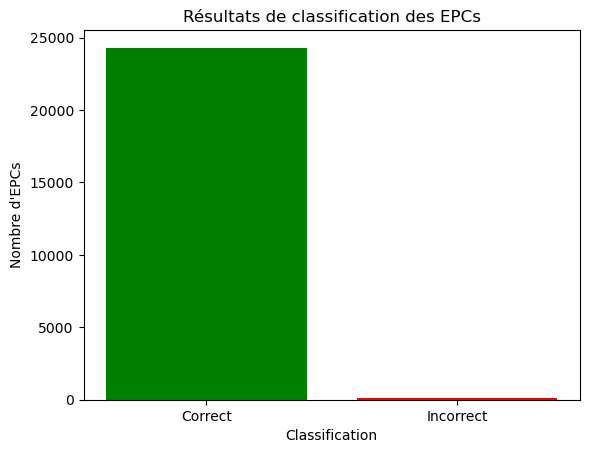

In [155]:
import matplotlib.pyplot as plt

# Compter le nombre d'EPCs correctement et incorrectement classés
num_correct = len(correctly_classified_indices)
num_incorrect = len(incorrectly_classified_indices)

# Créer un histogramme
plt.bar(['Correct', 'Incorrect'], [num_correct, num_incorrect], color=['green', 'red'])

# Ajouter des labels
plt.xlabel('Classification')
plt.ylabel('Nombre d\'EPCs')
plt.title('Résultats de classification des EPCs')

# Afficher l'histogramme
plt.show()


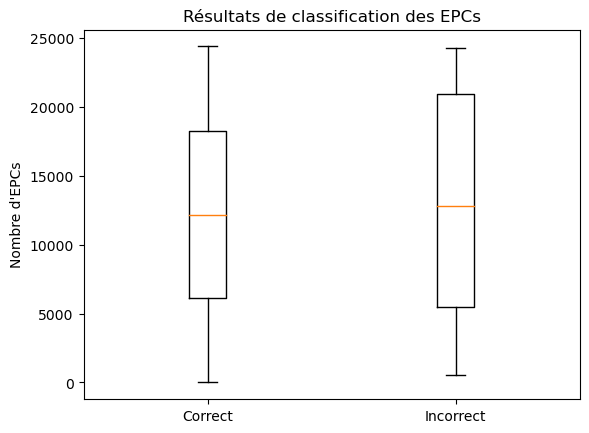

In [156]:
import matplotlib.pyplot as plt

# Données à afficher
data = [correctly_classified_indices, incorrectly_classified_indices]

# Créer la boîte à moustaches
plt.boxplot(data)

# Ajouter des labels aux axes
plt.xticks([1, 2], ['Correct', 'Incorrect'])
plt.ylabel('Nombre d\'EPCs')
plt.title('Résultats de classification des EPCs')

# Afficher la boîte à moustaches
plt.show()


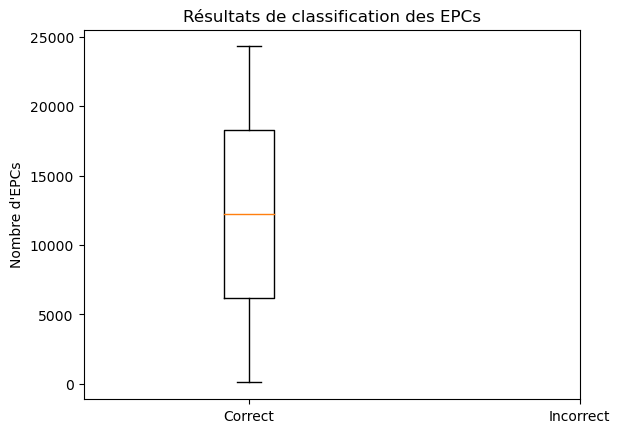

In [157]:
import matplotlib.pyplot as plt

# Données à afficher
correctly_classified_indices = [index for index, value in enumerate(y_pred) if value == y_encoded[index]]
incorrectly_classified_indices = [index for index, value in enumerate(y_pred) if value != y_encoded[index]]
correct_count = len(correctly_classified_indices)
incorrect_count = len(incorrectly_classified_indices)

# Créer la boîte à moustaches
plt.boxplot([correct_count, incorrect_count])

# Ajouter des labels aux axes
plt.xticks([1, 2], ['Correct', 'Incorrect'])
plt.ylabel('Nombre d\'EPCs')
plt.title('Résultats de classification des EPCs')

# Afficher la boîte à moustaches
plt.show()


In [158]:
# Fin du chronomètre
end_time = time.time()
# Calcul du temps écoulé en secondes
execution_time = end_time - start_time

# Affichage du temps d'exécution
print("Temps d'exécution :", execution_time, "secondes")

Temps d'exécution : 17.31082057952881 secondes


In [159]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.svm import SVC
from scipy.stats import uniform, randint
from sklearn.preprocessing import LabelEncoder

# Définir l'espace des hyperparamètres à explorer
param_dist = {
    'C': uniform(0.1, 10),  # Distribution uniforme pour C
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Choix du noyau
    'gamma': uniform(0.001, 1),  # Distribution uniforme pour gamma
    'degree': randint(2, 5),  # Distribution discrète pour le degré du noyau polynomial
}

# Créer un classifieur SVM
svm_model = SVC()

# Créer un objet StratifiedKFold pour la validation croisée
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Créer un objet RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=svm_model, param_distributions=param_dist, n_iter=50, cv=cv, random_state=42, n_jobs=-1)

# Créer un encodeur LabelEncoder
label_encoder = LabelEncoder()

# Encoder la variable cible
y_encoded = label_encoder.fit_transform(y)

# Adapter le modèle aux données d'entraînement
random_search.fit(x, y_encoded)

# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres trouvés : ", random_search.best_params_)

# Afficher la meilleure précision
print("Meilleure précision : ", random_search.best_score_)
